In [1]:
import pandas as pd

In [5]:
microdadosEnem = pd.read_csv("/content/drive/My Drive/Análise de dados/arquivosCSV/MICRODADOS_ENEM_2010.csv",sep=";")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,14,16,41,43,73,74,75,76,77,78,79,80,86,87,88,89,90,91,92,93,94,95,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,116,125) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ENSINO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_GESTANTE,IN_LACTANTE,IN_BRAILLE,IN_AMPLIADA,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_SABATISTA,IN_CERTIFICADO,IN_UNIDADE_PRISIONAL,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
0,200000000001,2010,3143302.0,MONTES CLAROS,31.0,MG,24.0,M,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,...,B,B,B,B,C,B,4.0,5.0,0.0,0.0,B,A,A,B,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200000000002,2010,1721000.0,PALMAS,17.0,TO,22.0,F,0.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,...,B,B,B,B,D,A,5.0,5.0,0.0,5.0,B,A,A,B,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200000000003,2010,1302603.0,MANAUS,13.0,AM,33.0,M,1.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,...,B,A,B,B,D,D,3.0,5.0,0.0,5.0,A,A,A,B,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200000000004,2010,3543907.0,RIO CLARO,35.0,SP,31.0,M,2.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,...,A,B,B,B,A,D,0.0,5.0,0.0,5.0,B,A,A,B,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200000000005,2010,3550308.0,SAO PAULO,35.0,SP,23.0,F,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,...,B,A,A,A,D,C,5.0,5.0,5.0,5.0,A,A,A,B,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ENSINO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA',
       'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_BRAILLE', 'IN_AMPLIADA',
       'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS',
       'IN_LEITURA_LABIAL', 'IN_SABATISTA', 'IN_CERTIFICADO',
       'IN_UNIDADE_PRISIONAL', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA',
       'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO

# Analisar a nota de matemática e a nota da redação em comparação as questões socioeconomicas Q02 e Q03

In [9]:
colunasSelecionadas=['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q02', 'Q03']

In [10]:
microdadosEnemSelecionado = microdadosEnem.filter(items=colunasSelecionadas)

In [11]:
microdadosEnemSelecionado = microdadosEnemSelecionado.dropna()

In [12]:
microdadosEnemSelecionado.head()


,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q02,Q03
0,200000000001,697.0,650.0,C,C
1,200000000002,415.9,350.0,I,D
2,200000000003,463.1,450.0,C,C
3,200000000004,618.3,0.0,C,C
5,200000000006,868.3,750.0,D,C


In [13]:
dicionario= {'A': 'Da 1 a 4 serie do Ensino Fundamental (antigo primario)',
'B': 'Da 5 a 8 serie do Ensino Fundamental (antigo ginasio)',
'C': 'Ensino Medio (antigo 2 grau)',
'D': 'Ensino Superior',
'E': 'Especializaçao',
'F': 'Mestrado',
'G': 'Doutorado',
'H': 'Nao estudou',
'I': 'Nao sei'}

In [14]:
microdadosEnemSelecionado.filter(items=['Q02', 'NU_INSCRICAO']).groupby ('Q02').count()

,NU_INSCRICAO
Q02,
A,983223
B,648596
C,830152
D,284337
E,61030
F,17615
G,9894
H,179724
I,232834


# Inserindo uma coluna no df

In [15]:
microdadosEnemSelecionado['NO_Q02'] = [dicionario[resp] for resp in microdadosEnemSelecionado.Q02]

In [16]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q02,Q03,NO_Q02
0,200000000001,697.0,650.0,C,C,Ensino Medio (antigo 2 grau)
1,200000000002,415.9,350.0,I,D,Nao sei
2,200000000003,463.1,450.0,C,C,Ensino Medio (antigo 2 grau)
3,200000000004,618.3,0.0,C,C,Ensino Medio (antigo 2 grau)
5,200000000006,868.3,750.0,D,C,Ensino Superior


In [17]:
microdadosEnemSelecionado['NO_Q03'] = [dicionario[resp] for resp in microdadosEnemSelecionado.Q03]

In [18]:
# Q02 = Qual é o nível de escolaridade do seu pai? 
# Q03 = Qual é o nível de escolaridade da sua mãe?
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q02,Q03,NO_Q02,NO_Q03
0,200000000001,697.0,650.0,C,C,Ensino Medio (antigo 2 grau),Ensino Medio (antigo 2 grau)
1,200000000002,415.9,350.0,I,D,Nao sei,Ensino Superior
2,200000000003,463.1,450.0,C,C,Ensino Medio (antigo 2 grau),Ensino Medio (antigo 2 grau)
3,200000000004,618.3,0.0,C,C,Ensino Medio (antigo 2 grau),Ensino Medio (antigo 2 grau)
5,200000000006,868.3,750.0,D,C,Ensino Superior,Ensino Medio (antigo 2 grau)


# Comparando a distribuição dos nivel de escolaridade dos pais e mães no conjunto de dados

In [19]:
# Q02 = Qual é o nível de escolaridade do seu pai? 
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO','NO_Q02']).groupby ('NO_Q02').count()

,NU_INSCRICAO
NO_Q02,
Da 1 a 4 serie do Ensino Fundamental (antigo primario),983223
Da 5 a 8 serie do Ensino Fundamental (antigo ginasio),648596
Doutorado,9894
Ensino Medio (antigo 2 grau),830152
Ensino Superior,284337
Especializaçao,61030
Mestrado,17615
Nao estudou,179724
Nao sei,232834


In [20]:
# Q02 = Qual é o nível de escolaridade do seu pai? 
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO','NO_Q02']).groupby ('NO_Q02').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q02,
Da 1 a 4 serie do Ensino Fundamental (antigo primario),983223
Ensino Medio (antigo 2 grau),830152
Da 5 a 8 serie do Ensino Fundamental (antigo ginasio),648596
Ensino Superior,284337
Nao sei,232834
Nao estudou,179724
Especializaçao,61030
Mestrado,17615
Doutorado,9894


In [21]:
# Q03 = Qual é o nível de escolaridade da sua mãe?
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO','NO_Q03']).groupby ('NO_Q03').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q03,
Ensino Medio (antigo 2 grau),961248
Da 1 a 4 serie do Ensino Fundamental (antigo primario),855751
Da 5 a 8 serie do Ensino Fundamental (antigo ginasio),693897
Ensino Superior,372984
Nao estudou,147914
Especializaçao,109037
Nao sei,81433
Mestrado,18674
Doutorado,6467


# Olhar o desempenho em matemática segundo a escolaridade dos pais e mães

In [22]:
microdadosEnemSelecionado.columns

Index(['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q02', 'Q03', 'NO_Q02',
       'NO_Q03'],
      dtype='object')

In [23]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q02,Q03,NO_Q02,NO_Q03
0,200000000001,697.0,650.0,C,C,Ensino Medio (antigo 2 grau),Ensino Medio (antigo 2 grau)
1,200000000002,415.9,350.0,I,D,Nao sei,Ensino Superior
2,200000000003,463.1,450.0,C,C,Ensino Medio (antigo 2 grau),Ensino Medio (antigo 2 grau)
3,200000000004,618.3,0.0,C,C,Ensino Medio (antigo 2 grau),Ensino Medio (antigo 2 grau)
5,200000000006,868.3,750.0,D,C,Ensino Superior,Ensino Medio (antigo 2 grau)


In [24]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q02']).groupby ('NO_Q02').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q02,
Doutorado,653.304205
Mestrado,645.258496
Especializaçao,627.380713
Ensino Superior,595.013006
Ensino Medio (antigo 2 grau),528.059626
Da 5 a 8 serie do Ensino Fundamental (antigo ginasio),495.297451
Da 1 a 4 serie do Ensino Fundamental (antigo primario),473.416795
Nao sei,471.565242
Nao estudou,445.396436


In [25]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q03']).groupby('NO_Q03').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q03,
Doutorado,655.247905
Mestrado,623.664330
Especializaçao,597.248258
Ensino Superior,576.103243
Ensino Medio (antigo 2 grau),520.504192
Da 5 a 8 serie do Ensino Fundamental (antigo ginasio),489.389450
Da 1 a 4 serie do Ensino Fundamental (antigo primario),469.659477
Nao sei,456.519908
Nao estudou,441.810952


# Olhando o desempenho em redação segundo a escolaridade dos pais

In [26]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q02']).groupby('NO_Q02').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q02,
Doutorado,648.117546
Mestrado,644.351405
Especializaçao,641.354252
Ensino Superior,624.933354
Ensino Medio (antigo 2 grau),590.905792
Da 5 a 8 serie do Ensino Fundamental (antigo ginasio),565.751176
Da 1 a 4 serie do Ensino Fundamental (antigo primario),554.960802
Nao sei,540.970713
Nao estudou,532.451008


In [27]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q03']).groupby('NO_Q03').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q03,
Doutorado,648.809340
Mestrado,633.012477
Especializaçao,631.339362
Ensino Superior,616.709229
Ensino Medio (antigo 2 grau),586.343951
Da 5 a 8 serie do Ensino Fundamental (antigo ginasio),561.839473
Da 1 a 4 serie do Ensino Fundamental (antigo primario),551.073589
Nao estudou,524.323593
Nao sei,514.369482


In [28]:
q02Redacao = microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q02']).groupby('NO_Q02').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

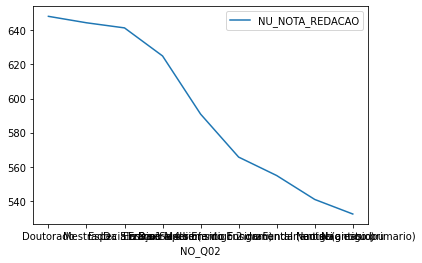

In [29]:
q02Redacao.plot()

In [30]:
q03Redacao= microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q03']).groupby('NO_Q03').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

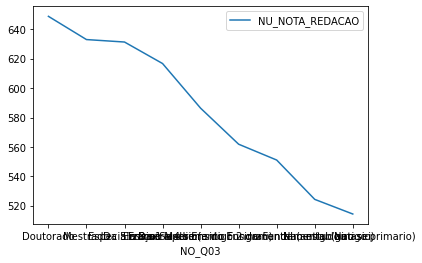

In [31]:
q03Redacao.plot()

In [32]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q02']).groupby('NO_Q02').describe()

NU_NOTA_REDACAO  ...        
                                                             count  ...     max
NO_Q02                                                              ...        
Da 1 a 4 serie do Ensino Fundamental (antigo pr...        983223.0  ...  1000.0
Da 5 a 8 serie do Ensino Fundamental (antigo gi...        648596.0  ...  1000.0
Doutorado                                                   9894.0  ...  1000.0
Ensino Medio (antigo 2 grau)                              830152.0  ...  1000.0
Ensino Superior                                           284337.0  ...  1000.0
Especializaçao                                             61030.0  ...  1000.0
Mestrado                                                   17615.0  ...  1000.0
Nao estudou                                               179724.0  ...  1000.0
Nao sei                                                   232834.0  ...  1000.0

[9 rows x 8 columns]

In [33]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q03']).groupby('NO_Q03').describe()

NU_NOTA_REDACAO  ...        
                                                             count  ...     max
NO_Q03                                                              ...        
Da 1 a 4 serie do Ensino Fundamental (antigo pr...        855751.0  ...  1000.0
Da 5 a 8 serie do Ensino Fundamental (antigo gi...        693897.0  ...  1000.0
Doutorado                                                   6467.0  ...  1000.0
Ensino Medio (antigo 2 grau)                              961248.0  ...  1000.0
Ensino Superior                                           372984.0  ...  1000.0
Especializaçao                                            109037.0  ...  1000.0
Mestrado                                                   18674.0  ...  1000.0
Nao estudou                                               147914.0  ...  1000.0
Nao sei                                                    81433.0  ...  1000.0

[9 rows x 8 columns]

# Desempenho na redação em relação a escolaridade dos pais separados por estados

In [34]:
colunasSelecionadas=['NU_INSCRICAO','SG_UF_RESIDENCIA','NU_NOTA_MT','NU_NOTA_REDACAO','Q02', 'Q03']

In [35]:
microdadosEnemSelecionado['SG_UF_RESIDENCIA'] = microdadosEnem.SG_UF_RESIDENCIA

In [36]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q02,Q03,NO_Q02,NO_Q03,SG_UF_RESIDENCIA
0,200000000001,697.0,650.0,C,C,Ensino Medio (antigo 2 grau),Ensino Medio (antigo 2 grau),MG
1,200000000002,415.9,350.0,I,D,Nao sei,Ensino Superior,TO
2,200000000003,463.1,450.0,C,C,Ensino Medio (antigo 2 grau),Ensino Medio (antigo 2 grau),AM
3,200000000004,618.3,0.0,C,C,Ensino Medio (antigo 2 grau),Ensino Medio (antigo 2 grau),SP
5,200000000006,868.3,750.0,D,C,Ensino Superior,Ensino Medio (antigo 2 grau),RJ


In [37]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q02'])\
                        .groupby('NO_Q02')\
                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q02,
Doutorado,648.117546
Mestrado,644.351405
Especializaçao,641.354252
Ensino Superior,624.933354
Ensino Medio (antigo 2 grau),590.905792
Da 5 a 8 serie do Ensino Fundamental (antigo ginasio),565.751176
Da 1 a 4 serie do Ensino Fundamental (antigo primario),554.960802
Nao sei,540.970713
Nao estudou,532.451008


In [38]:
# resultado do estado de São Paulo
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q02'])\
                        .where(microdadosEnemSelecionado.SG_UF_RESIDENCIA == 'SP')\
                        .groupby('NO_Q02')\
                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q02,
Doutorado,651.583997
Mestrado,650.614322
Especializaçao,640.710861
Ensino Superior,627.167363
Ensino Medio (antigo 2 grau),591.862585
Da 5 a 8 serie do Ensino Fundamental (antigo ginasio),569.375338
Da 1 a 4 serie do Ensino Fundamental (antigo primario),557.003010
Nao sei,543.967878
Nao estudou,530.187717


In [43]:
# lista de completa com todos os resultados do estado de São Paulo
microdadosEnemSelecionado.filter(items=['SG_UF_RESIDENCIA','NU_NOTA_REDACAO','NO_Q02'])\
                        .groupby(['SG_UF_RESIDENCIA','NO_Q02'])\
                        .mean()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q02                                                             
AC               Da 1 a 4 serie do Ensino Fundamental (antigo pr...       532.267267
                 Da 5 a 8 serie do Ensino Fundamental (antigo gi...       548.675595
                 Doutorado                                                566.666667
                 Ensino Medio (antigo 2 grau)                             560.196375
                 Ensino Superior                                          596.529345
...                                                                              ...
TO               Ensino Superior                                          605.572391
                 Especializaçao                                           628.035144
                 Mestrado                                                 596.052632
                 Nao estudou                                              491.561671
                 Nao sei                                                  521.223126

[243 rows x 1 columns]

In [44]:
import matplotlib.pyplot as plt

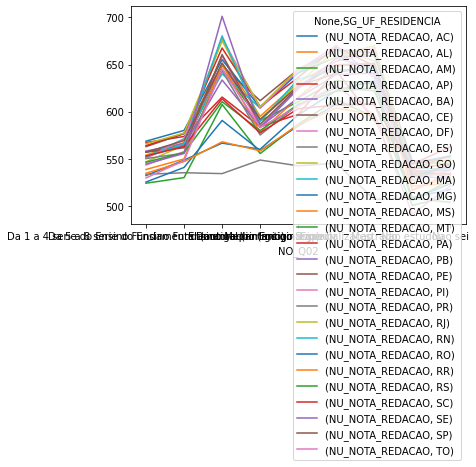

In [46]:
microdadosEnemSelecionado.filter(items=['SG_UF_RESIDENCIA','NO_Q02','NU_NOTA_REDACAO'])\
                      .groupby(['NO_Q02','SG_UF_RESIDENCIA'])\
                      .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                      .unstack().plot()

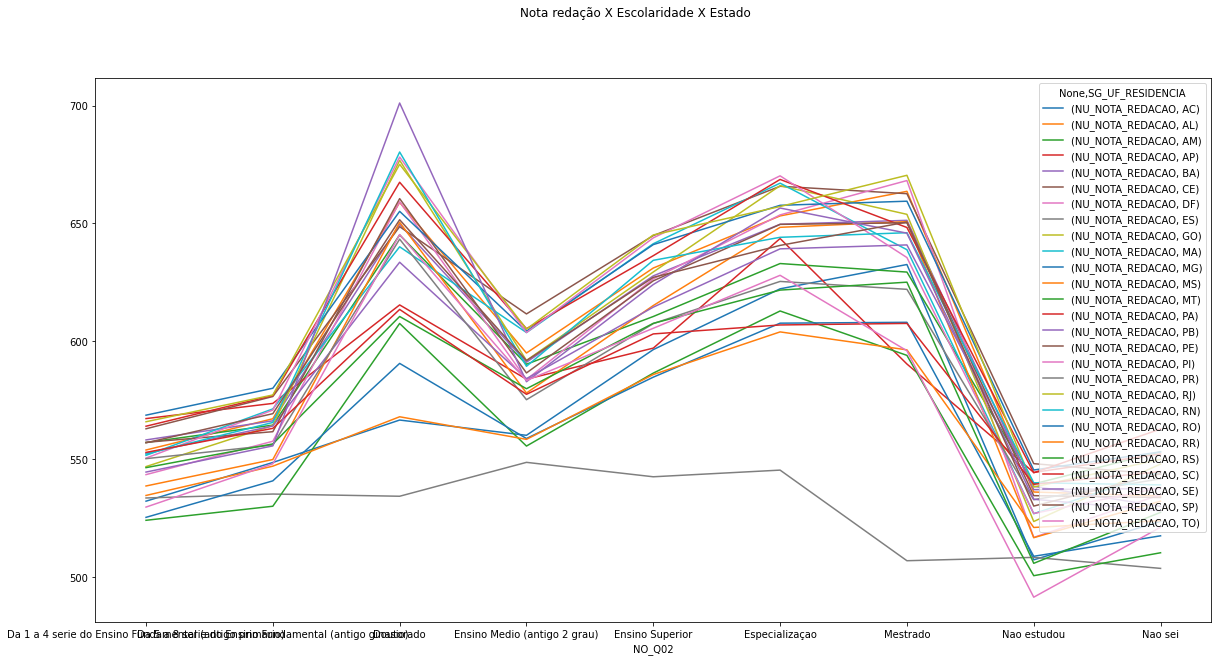

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
plt.suptitle('Nota redação X Escolaridade X Estado')

microdadosEnemSelecionado.filter(items=['SG_UF_RESIDENCIA','NO_Q02','NU_NOTA_REDACAO'])\
                      .groupby(['NO_Q02','SG_UF_RESIDENCIA'])\
                      .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                      .unstack().plot(ax=ax)

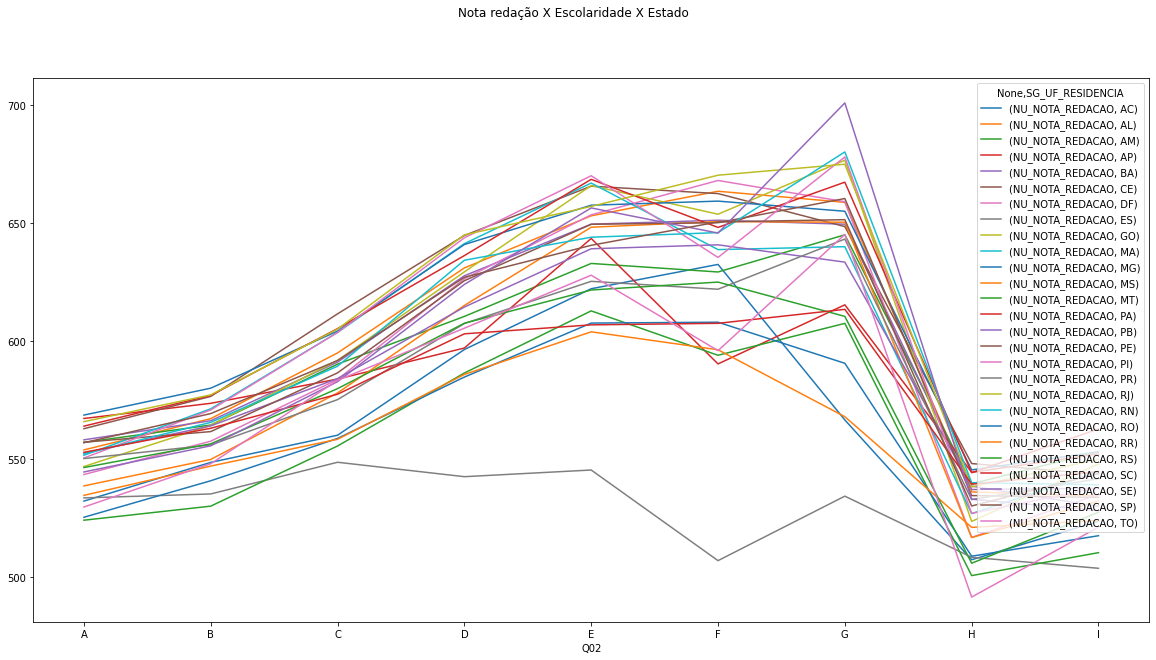

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
plt.suptitle('Nota redação X Escolaridade X Estado')

microdadosEnemSelecionado.filter(items=['SG_UF_RESIDENCIA','Q02','NU_NOTA_REDACAO'])\
                      .groupby(['Q02','SG_UF_RESIDENCIA'])\
                      .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                      .unstack().plot(ax=ax)

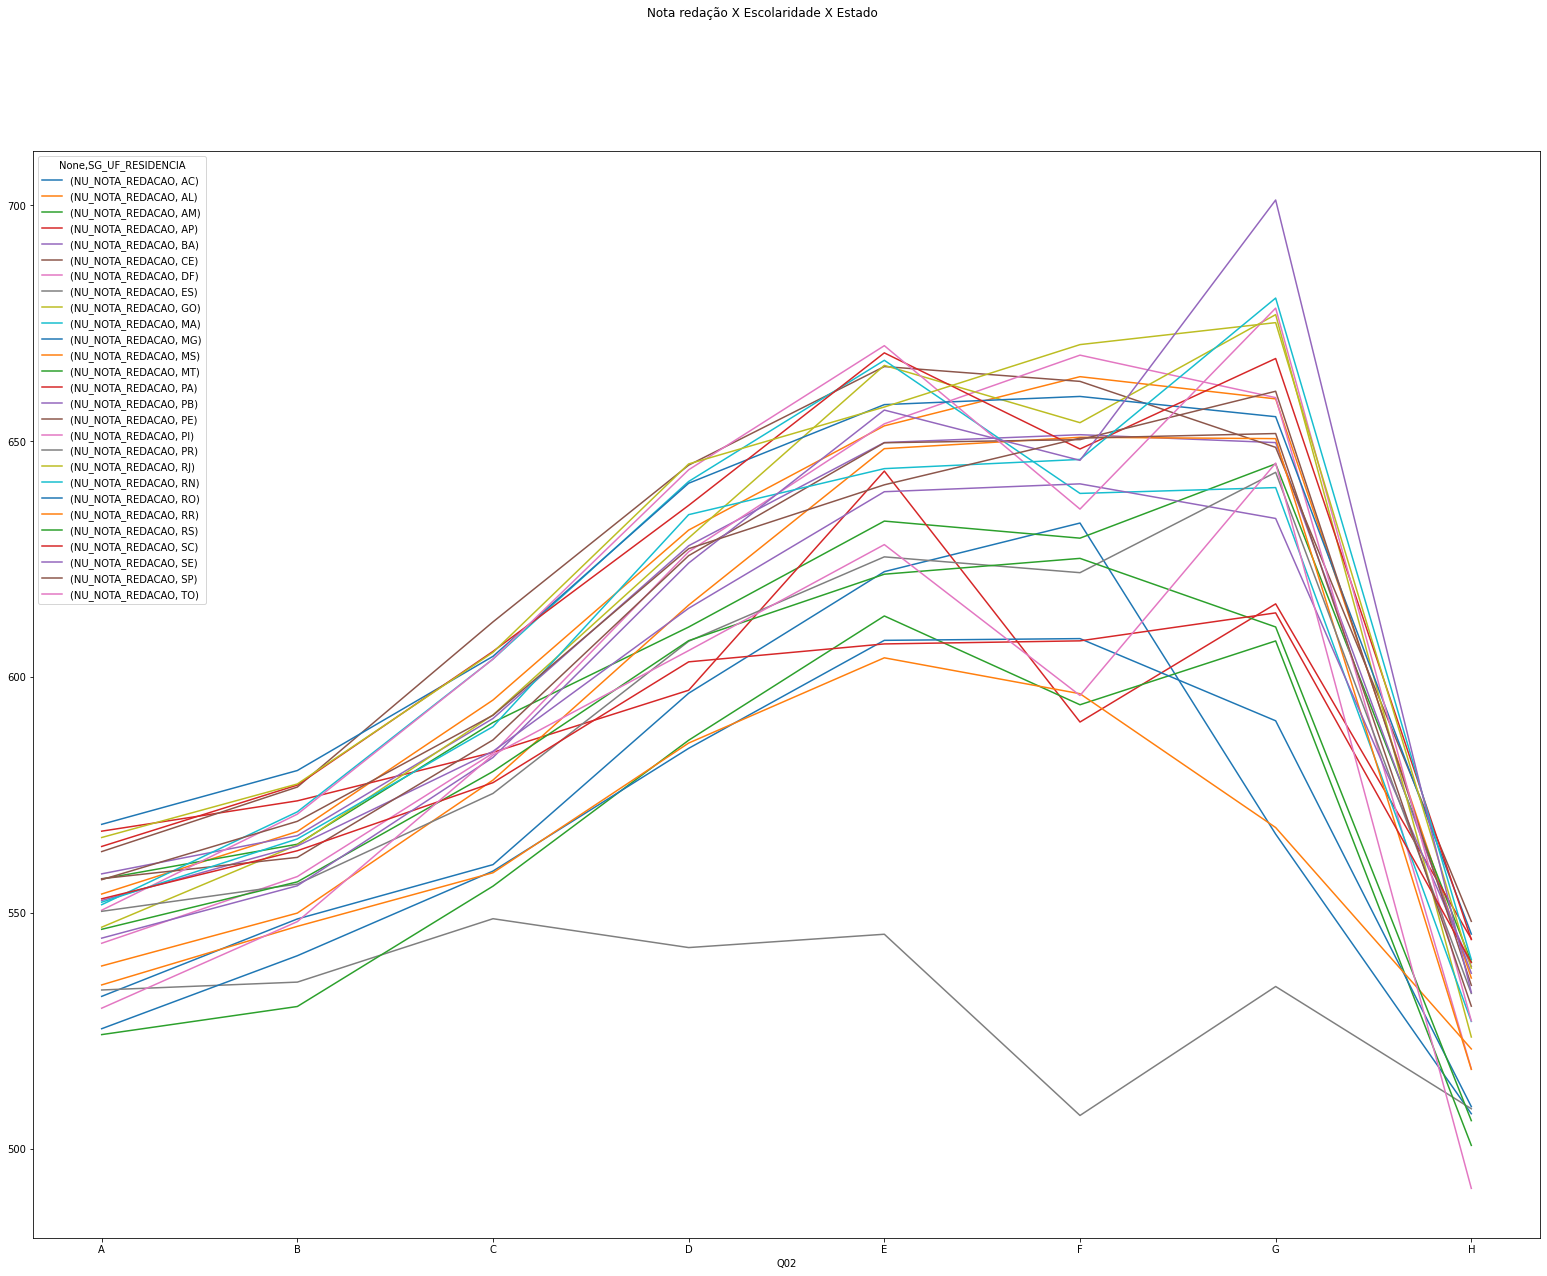

In [52]:
fig, ax = plt.subplots(figsize=(27,20))
plt.suptitle('Nota redação X Escolaridade X Estado')

microdadosEnemSelecionado.filter(items=['SG_UF_RESIDENCIA','Q02','NU_NOTA_REDACAO'])\
                      .where(microdadosEnemSelecionado.Q02 !='I')\
                      .groupby(['Q02','SG_UF_RESIDENCIA'])\
                      .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                      .unstack().plot(ax=ax)